**Engy-5050** Reactor Physics, UMass Lowell, Chem. Eng. Nuclear Program Spring 2022; Prof. V. F. de Almeida

# 1-D Point Source Neutron Transport
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anthony Bowers, Andrew Hamel <br>
**Course:** Engy-5050 Reactor Physics  <br>


UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**7March2022**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

### Domain
The domain utilized in the simulation is spherical geometry containt a point source. Surronding the point source is light-water.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = 1
    radius_o = 20 * radius_i
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.99,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

In [ ]:
show_domain()

ERROR:root:Unable to find a valid OpenGL 3.2 or later implementation. Please update your video card driver to the latest version. If you are using Mesa please make sure you have version 11.2 or later and make sure your driver in Mesa supports OpenGL 3.2 such as llvmpipe or openswr. If you are on windows and using Microsoft remote desktop note that it only supports OpenGL 3.2 with nvidia quadro cards. You can use other remoting software such as nomachine to avoid this issue.


## [Simulation](#toc)<a id="ranalysis"></a>

In [3]:

!./neutron__transport-opt -i input-test.hit



Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Mon Mar  7 14:58:17 2022
Executable Timestamp:    Mon Mar  7 13:56:55 2022

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   2001
  Elems:                   1000
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                6003
  Num Local DOFs:          6003
  Variables:               { "u1" "u2" "u3" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner:    lu 
  MOOSE Preconditioner:    FDP



*** Warning ***
/home/andrew/projects/neutron__transport/input-test.hit:10: unused parameter 

In [4]:
def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'].abs()*2.4e9,'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [g/cc]', fontsize=18, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    ax1.set_ylim(1e-12,1e12)
    ax1.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [5]:
import pandas as pd
df = pd.read_csv('output1G_x-data_0002.csv')
#plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')
print(df)


              id              u1              u2              u3           x  \
0       0.000000  1000000.000000  1000000.000000  1000000.000000    0.000000   
1       0.016667   696815.116818   696815.116818   696815.116818    0.016667   
2       0.033333   455505.220364   455505.220364   455505.220364    0.033333   
3       0.050000   276070.310637   276070.310637   276070.310637    0.050000   
4       0.066667   158510.387638   158510.387638   158510.387638    0.066667   
...          ...             ...             ...             ...         ...   
5996   99.933333        0.000030        0.000030        0.000030   99.933333   
5997   99.950000        0.000030        0.000030        0.000030   99.950000   
5998   99.966667        0.000030        0.000030        0.000030   99.966667   
5999   99.983333        0.000030        0.000030        0.000030   99.983333   
6000  100.000000        0.000030        0.000030        0.000030  100.000000   

      y  z  
0     0  0  
1     0  0  


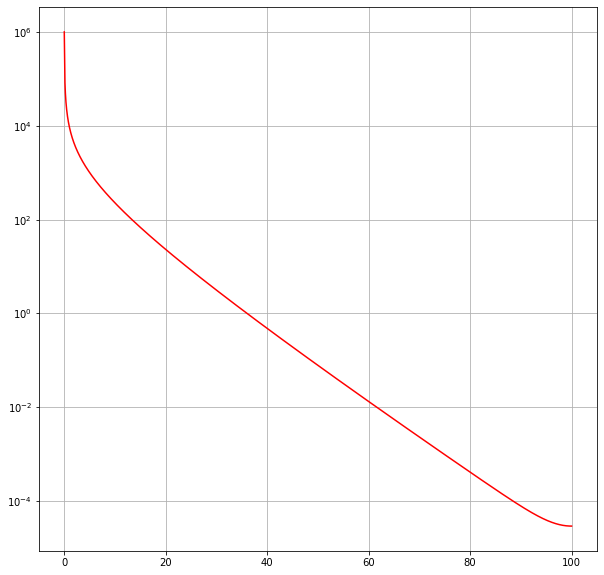

In [7]:
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.show()

## [Results and Analysis](#toc)<a id="ranalysis"></a>